# Product Analysis

- attempt to predict for customisation likelihood


In [785]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

In [786]:
def find_classes(df):
    res_dict = {}
    for col in df.columns:
      try:
        res_dict[col+'_classes'] = [df[str(col)].unique()]
      except:
         print(f'Error with {col}')
         pass
    res_df = pd.DataFrame(data=res_dict)
    display(res_df)

In [787]:
data_path = 'survey_results.csv'
raw_df= pd.read_csv(data_path)

In [788]:
find_classes(raw_df)

,Which age group do you belong to?_classes,What is your gender?_classes,Which category do you currently belong to?_classes,Which of the following best describes you?_classes,Which of these factors are important to you when deciding which car to purchase?_classes,How likely are you to opt for customised vehicle if there were no extra charges? _classes,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)? _classes","Which of the following interior components would you choose to customise (texture, layout, size, etc)? _classes",How much are you willing to spend on car customisation if surcharges are applicable?_classes,Are you interested in designing your own components to personalise your car? _classes,How much are you willing to pay for the personalised design? _classes,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)_classes",Please give us any design ideas to make the car uniquely Singaporean._classes
0,"[20-30, 51-60, 41-50, 31-40]","[Male, Female, Prefer not to say]","[Do not own a car, but planning to purchase in...","[Single, Married with children, Married with n...",[Price;Functionality;Size;Customisable options...,"[Very likely, Likely, Not likely]","[Grilles, Wheels;Grilles;Headlights;Side mirro...","[Centre compartment, Steering wheel;Dashboard,...","[100-500, under 500, 500-1000, over 1000, 0]","[Only with professional help, Yes, No]","[500-1000, under 500, over 1000, 0]","[No, I would need a designer to model my sketc...","[nan, wheels that look like the singapore flye..."


In [789]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Which age group do you belong to?                                                                                       50 non-null     object
 1   What is your gender?                                                                                                    50 non-null     object
 2   Which category do you currently belong to?                                                                              50 non-null     object
 3   Which of the following best describes you?                                                                              50 non-null     object
 4   Whic

In [790]:
print(raw_df.columns)

Index(['Which age group do you belong to?', 'What is your gender?',
       'Which category do you currently belong to?',
       'Which of the following best describes you?',
       'Which of these factors are important to you when deciding which car to purchase?',
       'How likely are you to opt for customised vehicle if there were no extra charges? ',
       'Which of the following exterior components would you choose to customise (texture, layout, size, etc)? ',
       'Which of the following interior components would you choose to customise (texture, layout, size, etc)? ',
       'How much are you willing to spend on car customisation if surcharges are applicable?',
       'Are you interested in designing your own components to personalise your car? ',
       'How much are you willing to pay for the personalised design? ',
       'Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)',
       'Please give us any desi

## 1. Selection


In [791]:
target_df = raw_df.copy()

## 2. Fusing and Cleansing


In [792]:
preprocessed_df = target_df.copy()

In [793]:
def check_percentage(df, col, show = False):
  counts = df[col].value_counts()
  percentages = (counts / counts.sum()) * 100
  for index, value in percentages.items():
    if value < 5 or show:
        print('_'*80)
        print(col)
        print('_'*80)
        print(percentages)
        break

### Rename Columns


In [794]:
rename_dict = {'Which age group do you belong to?': 'age_group', 
                'What is your gender?': 'gender', 
                "Which category do you currently belong to?": "car_ownership",
                "Which of the following best describes you?": "maritial_status",
                "Which of these factors are important to you when deciding which car to purchase?": "purchase_factors",
                "How likely are you to opt for customised vehicle if there were no extra charges? ": "customise_likelihood",
                "Which of the following exterior components would you choose to customise (texture, layout, size, etc)? ": "exterior_components",
                "Which of the following interior components would you choose to customise (texture, layout, size, etc)? ": "interior_components",
                "How much are you willing to spend on car customisation if surcharges are applicable?": "customise_spend",
                "Are you interested in designing your own components to personalise your car? ": "personalise_interest",
                "How much are you willing to pay for the personalised design? ": "personalise_spend",
                "Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)": "design_experience",
                "Please give us any design ideas to make the car uniquely Singaporean.": "design_ideas"
                }

preprocessed_df.rename(columns=rename_dict, inplace=True)
df = pd.DataFrame(rename_dict.items(), columns=["Initial", "Renamed"]) 
display(df)

,Initial,Renamed
0,Which age group do you belong to?,age_group
1,What is your gender?,gender
2,Which category do you currently belong to?,car_ownership
3,Which of the following best describes you?,maritial_status
4,Which of these factors are important to you wh...,purchase_factors
5,How likely are you to opt for customised vehic...,customise_likelihood
6,Which of the following exterior components wou...,exterior_components
7,Which of the following interior components wou...,interior_components
8,How much are you willing to spend on car custo...,customise_spend
9,Are you interested in designing your own compo...,personalise_interest


### Dropping null values


In [795]:
preprocessed_df = preprocessed_df.dropna(subset=['exterior_components', 'purchase_factors'])
preprocessed_df = preprocessed_df[preprocessed_df['gender'] != 'Prefer not to say']
preprocessed_df.reset_index(drop=True, inplace=True)

### Creating Lists in Columns


In [796]:
preprocessed_df['purchase_factors'] = preprocessed_df['purchase_factors'].str.split(';')
preprocessed_df['exterior_components'] = preprocessed_df['exterior_components'].str.split(';')
preprocessed_df['interior_components'] = preprocessed_df['interior_components'].str.split(';')

### Merging similar data


In [797]:
# for col in preprocessed_df.columns:
#   check_percentage(preprocessed_df, col)

In [798]:
# preprocessed_df = preprocessed_df[preprocessed_df['customise_likelihood'] != 'Not likely']
# preprocessed_df.reset_index(drop=True, inplace=True)

In [799]:
preprocessed_df['customise_spend'] = preprocessed_df.apply(lambda row: 'under 500' if row['customise_spend'] == '100-500' else row['customise_spend'], axis=1)
# preprocessed_df['customise_spend'] = preprocessed_df.apply(lambda row: 'under 500' if row['customise_spend'] == '0' else row['customise_spend'], axis=1)

In [800]:
# preprocessed_df['personalise_spend'] = preprocessed_df.apply(lambda row: 'under 500' if row['personalise_spend'] == '0' else row['personalise_spend'], axis=1)

### Tersing Data


In [801]:
preprocessed_df['car_ownership'] = preprocessed_df.apply(lambda row: 'None' if row['car_ownership'] == 'Do not own a car, but planning to purchase in future' else row['car_ownership'], axis=1)
preprocessed_df['car_ownership'] = preprocessed_df.apply(lambda row: 'One' if row['car_ownership'] == 'Own a car' else row['car_ownership'], axis=1)
preprocessed_df['car_ownership'] = preprocessed_df.apply(lambda row: 'More than One' if row['car_ownership'] == 'Own more than one car' else row['car_ownership'], axis=1)

In [802]:
preprocessed_df['design_experience'] = preprocessed_df.apply(lambda row: 1 if row['design_experience'] == 'Yes, I can design on my own' else 0, axis=1)

### filling na


In [803]:
preprocessed_df['design_ideas'] = preprocessed_df['design_ideas'].fillna('none')

In [804]:
# preprocessed_df.head()

## 3. Data Transformation


In [805]:
transformed_df = preprocessed_df.copy()

In [806]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [807]:
def expand_list_values(df, col):
    res_df = df.copy()
    dummy_df = pd.get_dummies(data=df[col].explode(), dtype=int, prefix=col, prefix_sep=':').groupby(level=0).sum()
    res_df = pd.concat([df, dummy_df], axis=1)
    # res_df = res_df.drop(columns=[col])
    return res_df
def expand_non_binary_values(df, col):
    res_df = df.copy()
    dummy_df = pd.get_dummies(data=df[col], dtype=int, prefix=col, prefix_sep=':').groupby(level=0).sum()
    res_df = pd.concat([df, dummy_df], axis=1)
    res_df = res_df.drop(columns=[col])
    return res_df
def encode_data_by_count(column_name, data_frame):
  print("_"*120)
  label_encoder = LabelEncoder()
  encoded_column_name = column_name+"_encoded"
  data_frame[encoded_column_name] = label_encoder.fit_transform(data_frame[column_name])
  legend = data_frame[[column_name, encoded_column_name]].copy()
  legend = legend.drop_duplicates().reset_index(drop=True)
  print(legend)
def encode_by_label(df, unique_values, col):
  print("_"*120)
  encoded_column_name = col+"_encoded"
  for i, val in enumerate(unique_values):
    if val not in df[col].unique():
      print(f"'{val}' not in {col}")
      return
  label_mapping = {val: i for i, val in enumerate(unique_values)}
  df[encoded_column_name] = df[col].map(label_mapping)
  legend = df[[col, encoded_column_name]].copy()
  legend = legend.drop_duplicates()
  legend = legend.sort_values(by=encoded_column_name)
  legend = legend.reset_index(drop=True)
  print(legend)

### Expanding Lists


In [808]:
transformed_df=expand_list_values(transformed_df, 'purchase_factors')
transformed_df=expand_list_values(transformed_df, 'exterior_components')
transformed_df=expand_list_values(transformed_df, 'interior_components')

In [809]:
transformed_df['design_ideas'] = preprocessed_df.apply(lambda row: 0 if row['design_ideas'] == 'none' else 1, axis=1)

In [810]:
find_classes(transformed_df)

Error with purchase_factors
Error with exterior_components
Error with interior_components


,age_group_classes,gender_classes,car_ownership_classes,maritial_status_classes,customise_likelihood_classes,customise_spend_classes,personalise_interest_classes,personalise_spend_classes,design_experience_classes,design_ideas_classes,...,exterior_components:Side mirrors_classes,exterior_components:Wheels_classes,exterior_components:add body kit and change the exhaust and tune the engine_classes,exterior_components:doors_classes,interior_components:Centre compartment_classes,interior_components:Dashboard_classes,interior_components:Door handles_classes,interior_components:Steering wheel_classes,interior_components:Sun blocker for front passengers_classes,interior_components:air vent_classes
0,"[20-30, 51-60, 41-50, 31-40]","[Male, Female]","[None, More than One, One]","[Single, Married with children, Married with n...","[Very likely, Likely, Not likely]","[under 500, 500-1000, over 1000, 0]","[Only with professional help, Yes, No]","[500-1000, under 500, over 1000, 0]","[0, 1]","[0, 1]",...,"[0, 1]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]"


### Encoding Data


In [811]:
encode_data_by_count('gender', transformed_df)
encode_data_by_count('maritial_status', transformed_df)

________________________________________________________________________________________________________________________
   gender  gender_encoded
0    Male               1
1  Female               0
________________________________________________________________________________________________________________________
            maritial_status  maritial_status_encoded
0                    Single                        2
1     Married with children                        0
2  Married with no children                        1


In [812]:
encode_by_label(transformed_df, ['0', 'under 500', '500-1000', 'over 1000'], 'customise_spend')
encode_by_label(transformed_df, ['0', 'under 500', '500-1000', 'over 1000'], 'personalise_spend')
encode_by_label(transformed_df, ['None', 'One', 'More than One'], 'car_ownership')
encode_by_label(transformed_df, ['Not likely', 'Likely', 'Very likely'], 'customise_likelihood')
encode_by_label(transformed_df, ['No', 'Only with professional help','Yes'], 'personalise_interest')
encode_by_label(transformed_df, ['20-30', '31-40', '41-50', '51-60'], 'age_group')

________________________________________________________________________________________________________________________
  customise_spend  customise_spend_encoded
0               0                        0
1       under 500                        1
2        500-1000                        2
3       over 1000                        3
________________________________________________________________________________________________________________________
  personalise_spend  personalise_spend_encoded
0                 0                          0
1         under 500                          1
2          500-1000                          2
3         over 1000                          3
________________________________________________________________________________________________________________________
   car_ownership  car_ownership_encoded
0           None                      0
1            One                      1
2  More than One                      2
___________________________

In [813]:
purchase_factors = transformed_df['purchase_factors'].explode().unique().tolist()
for i, val in enumerate(purchase_factors):
  purchase_factors[i] = 'purchase_factors:' + val
interior_components = transformed_df['interior_components'].explode().unique().tolist()
for i, val in enumerate(interior_components):
  interior_components[i] = 'interior_components:' + val
exterior_components = transformed_df['exterior_components'].explode().unique().tolist()
for i, val in enumerate(exterior_components):
  exterior_components[i] = 'exterior_components:' + val

In [814]:
select_columns = [col if 'encoded'in col else None for col in transformed_df.columns]
select_columns = [i for i in select_columns if i != None]

,customise_spend_encoded,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-0.342966,-0.467382,0.772813,-0.874561,0.007911,0.513917,-0.244072,-0.156381,-0.713762,0.210873,0.472707,-0.244218
1,1,-0.643931,0.472230,1.073238,0.719167,0.164898,-0.523966,-0.260580,-0.579978,-0.618728,0.257775,0.265912,-0.368112
2,2,-0.571684,-0.392029,-0.750746,0.412543,-0.223591,-0.599146,-0.455403,0.298952,-0.578349,-0.359094,0.019481,0.463895
3,1,-0.728085,0.462641,-0.207818,1.088697,-1.370331,-0.128958,-0.445509,-0.056761,0.132624,0.004707,0.002127,-0.141074
4,3,-0.262032,-1.381839,0.201306,0.374210,-0.004987,1.011061,-0.676951,0.274838,-0.108283,0.212067,0.490468,0.357724


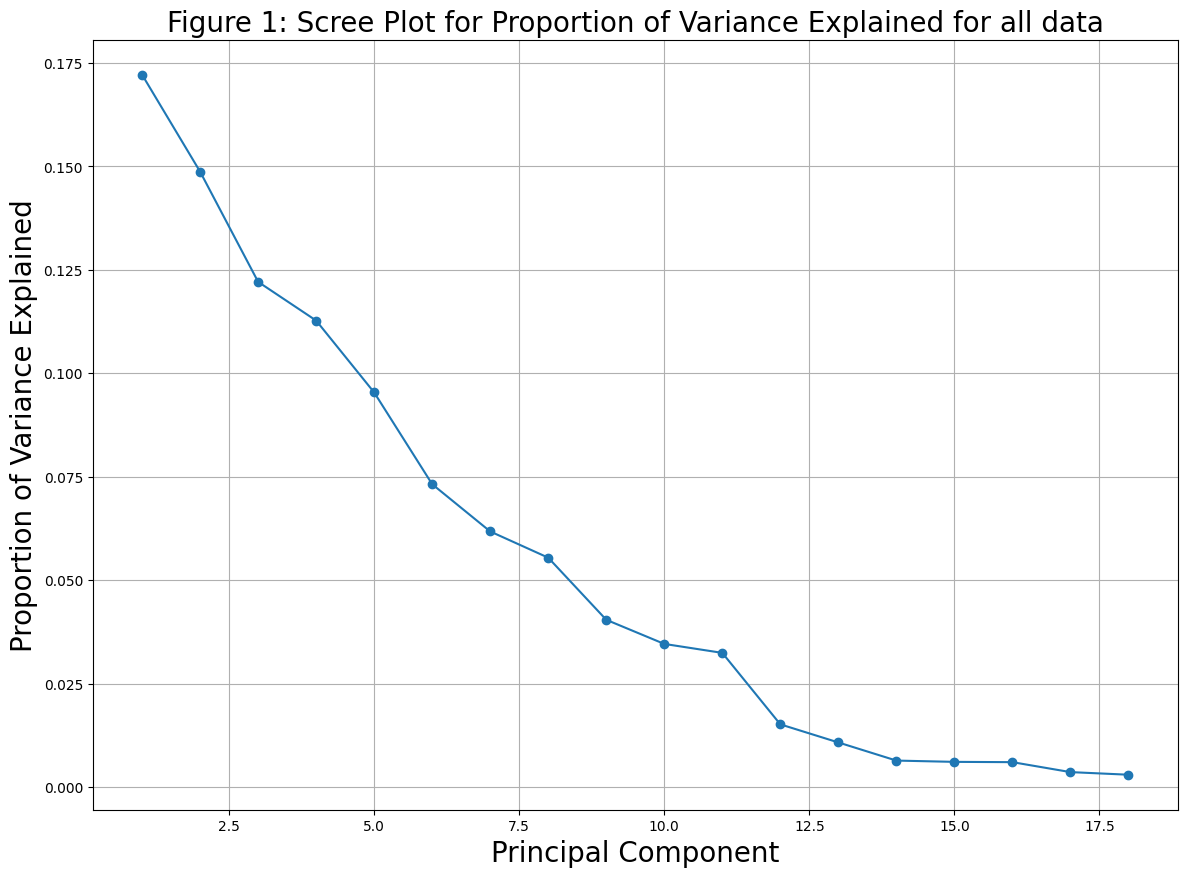

In [815]:
reduced_df = transformed_df.copy()
select_columns = [col if 'encoded'in col else None for col in transformed_df.columns]
select_columns += interior_components+exterior_components

for col in reduced_df.columns:
  if col not in select_columns:
    reduced_df.drop(col, axis=1, inplace=True)

df = reduced_df.copy()
scaler = MinMaxScaler()
df = pd.DataFrame(data = scaler.fit_transform(df), columns = df.columns)

pca = PCA()
pca.fit(df.drop(['customise_spend_encoded', 'personalise_spend_encoded', 'personalise_interest_encoded', 'customise_likelihood_encoded'], axis=1))

eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)

plt.figure(figsize=(14,10))
plt.plot(np.arange(1, len(prop_var)+1), 
                   prop_var, marker='o')
plt.xlabel('Principal Component',
           size = 20)
plt.ylabel('Proportion of Variance Explained',
           size = 20)
plt.title('Figure 1: Scree Plot for Proportion of Variance Explained for all data',
          size = 20)
plt.grid(True)

reduced_df = PCA(n_components=12).fit_transform(reduced_df.drop('customise_spend_encoded', axis=1))
reduced_df = pd.concat([transformed_df['customise_spend_encoded'], pd.DataFrame(reduced_df)], axis=1)

display(reduced_df.head())

,customise_spend_encoded,0,1,2,3,4,5,6,7,8,9
0,1,0.752283,0.520488,1.127373,0.186098,0.017807,0.121602,-0.491612,-0.051203,-0.210258,0.041665
1,1,-0.525329,0.693989,0.827212,-0.565854,0.134729,-0.250228,0.039898,-0.316882,-0.573255,0.028455
2,2,-0.494828,0.267373,-0.680410,-0.550887,0.544538,-0.323783,-0.355017,0.035658,-0.344805,-0.013644
3,1,-1.125579,0.882470,-0.506884,0.389565,-0.314611,-0.053677,0.026231,-0.113149,0.214095,0.059179
4,3,-0.573089,0.412876,0.451434,0.851799,0.693278,-0.036523,0.376733,0.007251,-0.184820,0.045525


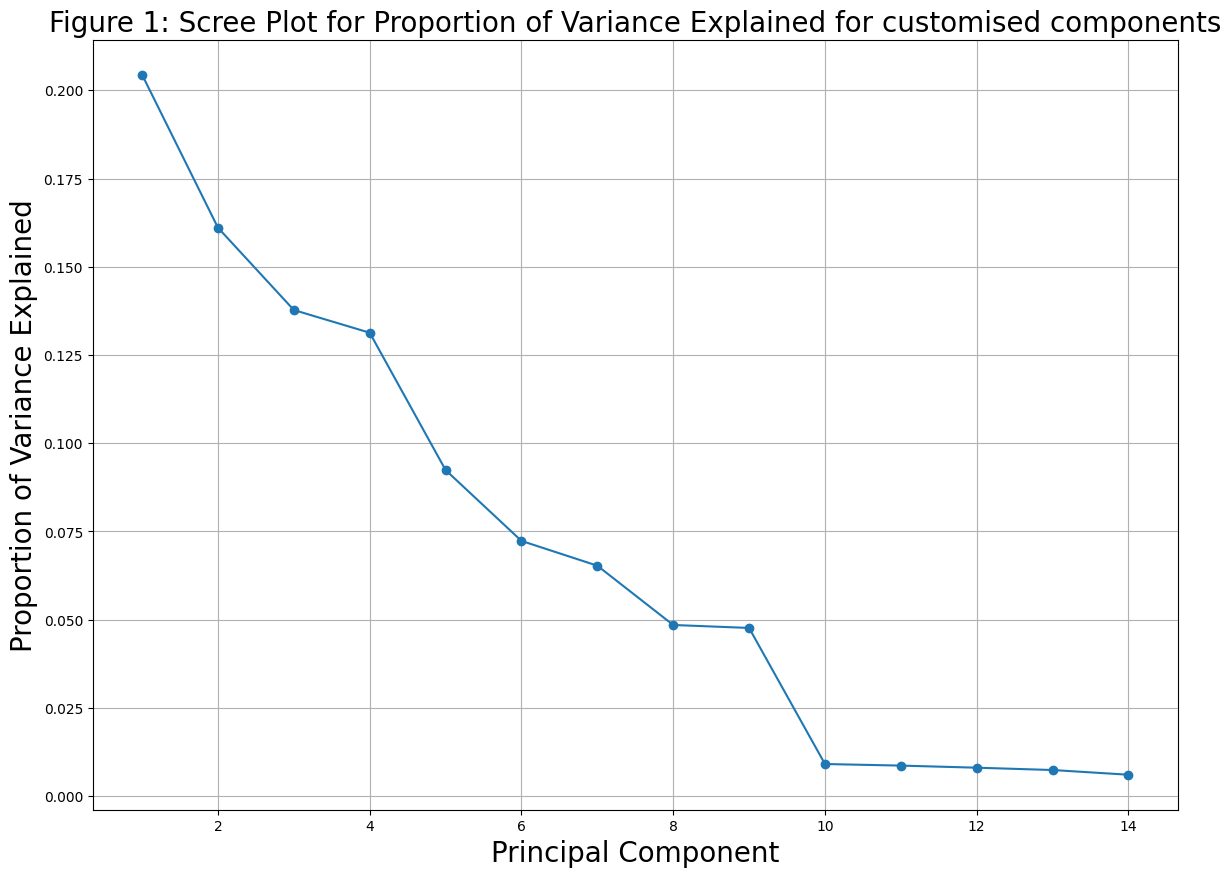

In [816]:
reduced_components_df = transformed_df.copy()

select_columns = ['customise_spend_encoded']+interior_components+exterior_components
for col in reduced_components_df.columns:
  if col not in select_columns:
    reduced_components_df.drop(col, axis=1, inplace=True)

df = reduced_components_df.copy()
scaler = MinMaxScaler()
df = pd.DataFrame(data = scaler.fit_transform(df), columns = df.columns)

pca = PCA()
pca.fit(df.drop('customise_spend_encoded', axis=1))

eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)

plt.figure(figsize=(14,10))
plt.plot(np.arange(1, len(prop_var)+1), 
                   prop_var, marker='o')
plt.xlabel('Principal Component',
           size = 20)
plt.ylabel('Proportion of Variance Explained',
           size = 20)
plt.title('Figure 1: Scree Plot for Proportion of Variance Explained for customised components',
          size = 20)
plt.grid(True)

reduced_components_df = PCA(n_components=10).fit_transform(reduced_components_df.drop('customise_spend_encoded', axis=1))
reduced_components_df = pd.concat([transformed_df['customise_spend_encoded'], pd.DataFrame(reduced_components_df)], axis=1)

display(reduced_components_df.head())

## 4. Data Mining


In [817]:
data=transformed_df.copy()
reduced_data = reduced_df.copy()

In [818]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score,confusion_matrix,classification_report
from arulespy.arules import Transactions, apriori, parameters, concat

In [819]:
def model_evaluation(model, X_train, X_test, y_train, y_test, print_results=True):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  if print_results:
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
    print(f"Precision Score: \n{precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
  # tp, fn, fp, tn = confusion_matrix(y_test,y_pred).reshape(-1)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  model_dict={'Model': [model.__class__.__name__], 'Accuracy': [round(accuracy,3)], 'F1_Score': [round(f1,3)], 'Precision': [round(precision,3)], 'Recall': [round(recall,3)]}
  try:
    model_df = pd.DataFrame(data=model_dict)
  except:
    print("Error creating model_df")
    print(model_dict)
    return
  return model, model_df

In [820]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), KNeighborsClassifier(), GaussianNB()]

### Data Visualisation


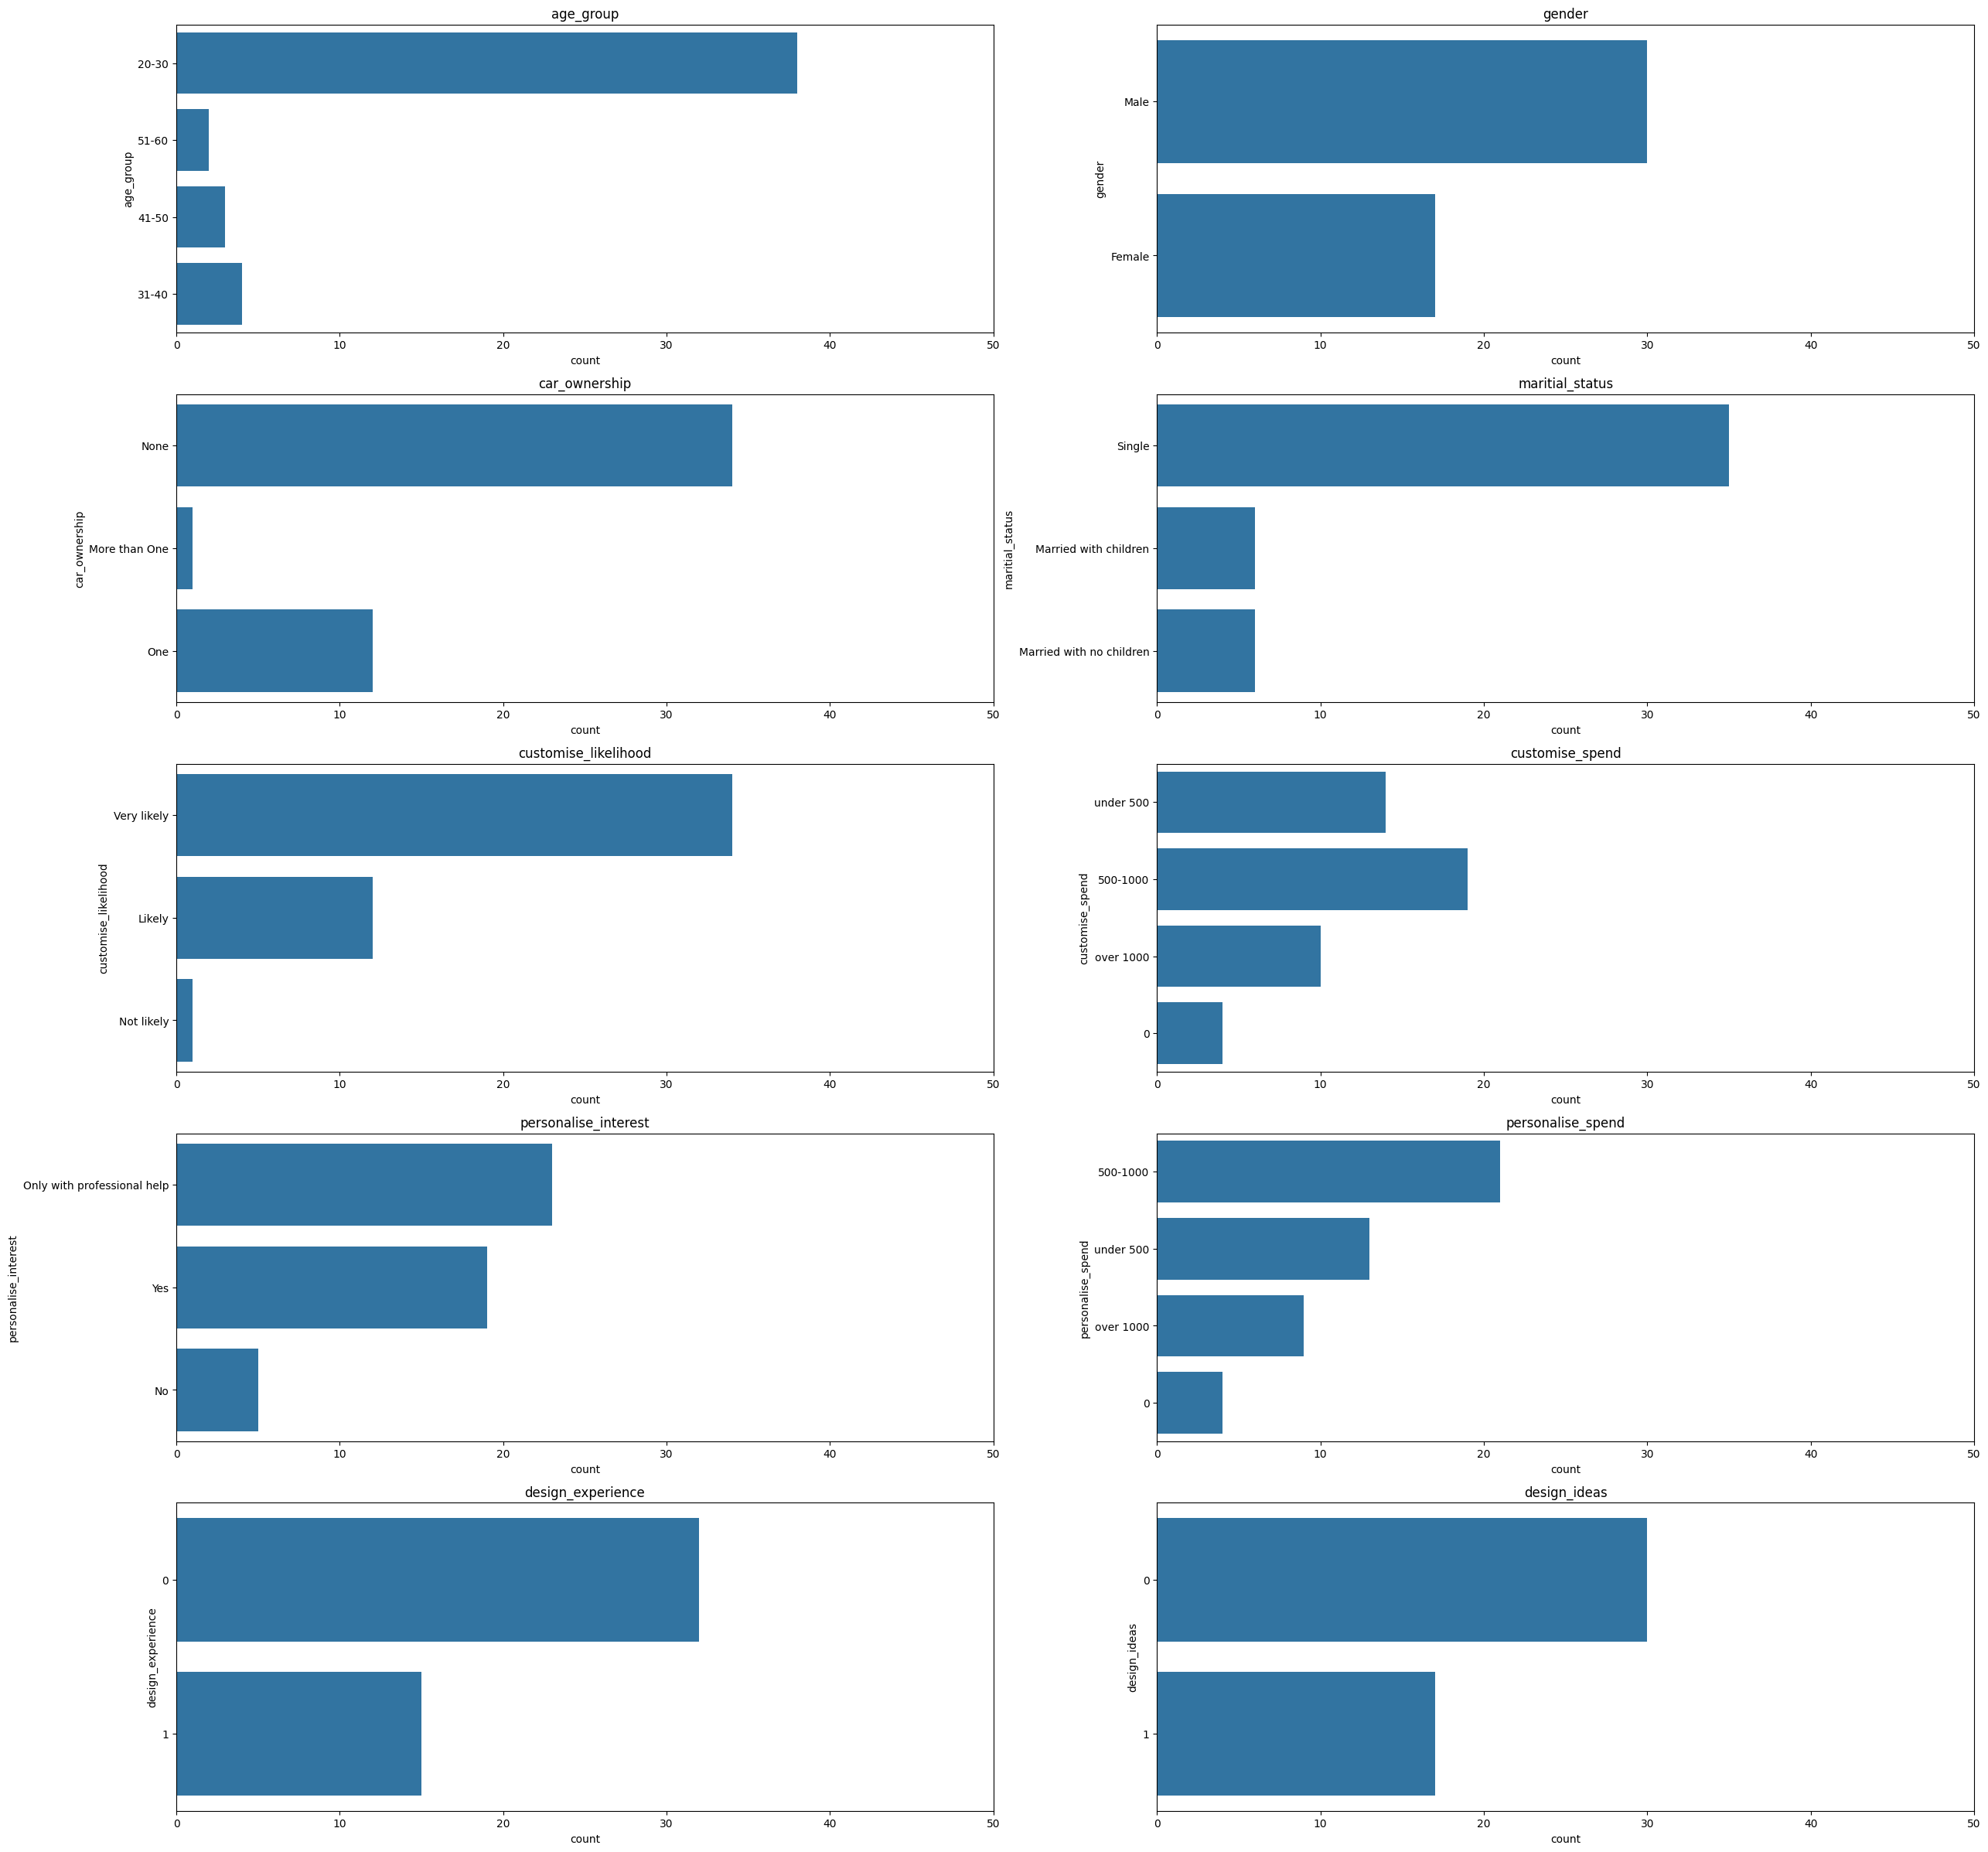

In [821]:
fig, ax = plt.subplots(figsize=(30, 30))
plt.axis('off')
select_columns = ['age_group', 'gender',
                  'car_ownership', 'maritial_status', 
                  'customise_likelihood', 'customise_spend', 
                  'personalise_interest', 'personalise_spend',
                  'design_experience', 'design_ideas']
for i, col in enumerate(select_columns):
  plt.subplot(5, 2, i+1)
  sns.countplot(data=data, y=col, orient='h')#, hue='customise_spend_encoded')
  plt.title(col)
  plt.xlim(0,50)
plt.show()

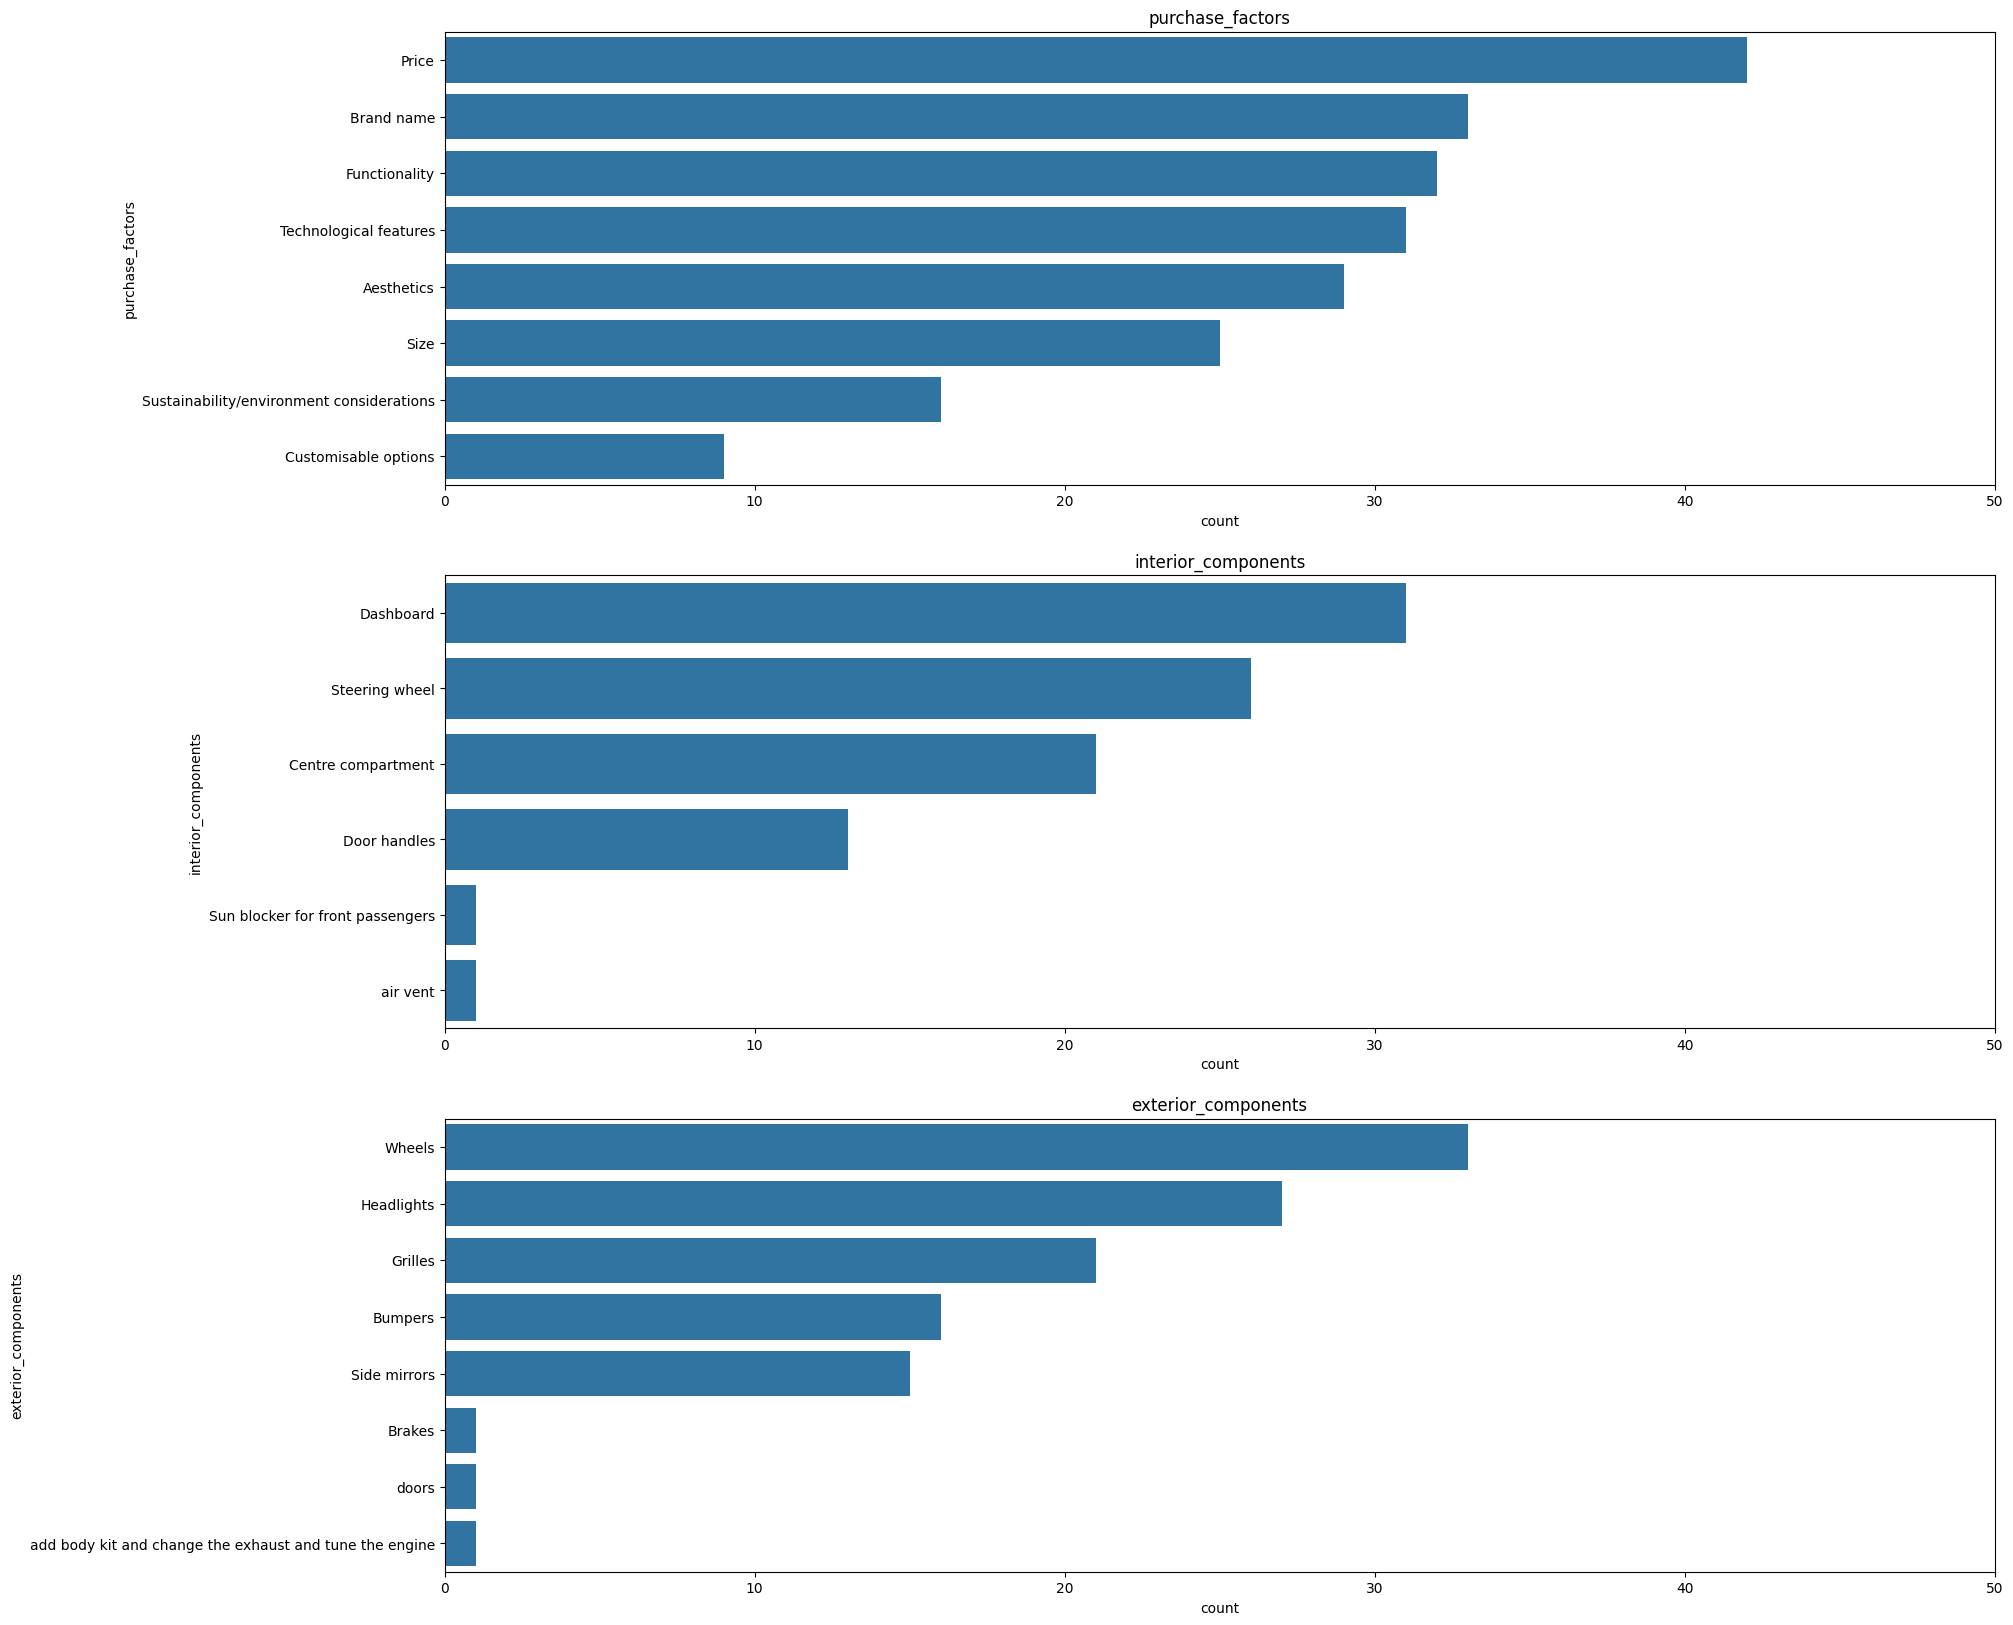

In [822]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.axis('off')
select_columns = ['purchase_factors', 
                  'interior_components', 
                  'exterior_components']
for i, col in enumerate(select_columns):
  plt.subplot(3, 1, i+1)
  sns.barplot(data=data[col].explode().value_counts(),orient='h')
  plt.title(col)
  plt.xlim(0,50)
plt.show()

### Correlation Analysis


In [823]:
test_data = data.copy()
dropped_columns = [ 'age_group', 'gender',
                    'car_ownership', 'maritial_status', 
                    'customise_likelihood', 'customise_spend', 
                    'personalise_interest', 'personalise_spend',
                    'design_experience', 'design_ideas', 
                    'purchase_factors', 'interior_components', 
                    'exterior_components'
                    ]
test_data.drop(dropped_columns, axis=1, inplace=True)
corr = test_data.corr()

In [824]:
features_dict = {}
customise_features = []
for val in corr['customise_spend_encoded']:
  factor = 0.2
  if val > factor or val < -factor:
    features_dict[corr['customise_spend_encoded'][corr['customise_spend_encoded'] == val].index[0]] = [val]
    customise_features.append(corr['customise_spend_encoded'][corr['customise_spend_encoded'] == val].index[0])
display(pd.DataFrame(data=features_dict).transpose().rename(columns={0:'pearson_correlation to customise_spend'}).sort_values(by='pearson_correlation to customise_spend', ascending=False))

,pearson_correlation to customise_spend
customise_spend_encoded,1.000000
personalise_spend_encoded,0.722008
exterior_components:Wheels,0.337218
gender_encoded,0.332648
interior_components:Steering wheel,0.272192
purchase_factors:Price,-0.255056
exterior_components:Brakes,-0.290175


In [825]:
features_dict = {}
personalise_features = []
for val in corr['personalise_spend_encoded']:
  factor = 0.2
  if val > factor or val < -factor:
    features_dict[corr['personalise_spend_encoded'][corr['personalise_spend_encoded'] == val].index[0]] = [val]
    personalise_features.append(corr['personalise_spend_encoded'][corr['personalise_spend_encoded'] == val].index[0])
display(pd.DataFrame(data=features_dict).transpose().rename(columns={0:'pearson_correlation to personalise_spend'}).sort_values(by='pearson_correlation to personalise_spend', ascending=False))

,pearson_correlation to personalise_spend
personalise_spend_encoded,1.000000
customise_spend_encoded,0.722008
interior_components:Sun blocker for front passengers,0.214677
purchase_factors:Customisable options,0.206839
purchase_factors:Aesthetics,-0.233309
purchase_factors:Price,-0.262255
exterior_components:Brakes,-0.298365


from the correlation matrix, we can conclude that there is a strong positive correlation between the amount one is willing to spend  
on a customisation and:

- exterior_components:Wheels
- gender_encoded
- interior_components:Steering wheel
- purchase_factors:Sustainability/environment considerations

</br>
Therefore, you may increase these aspects to allow for more revenue


### Classification of data


In [826]:
modeled_data = data.copy()
for col in modeled_data.columns:
  if col not in customise_features:
    if col == 'customise_spend_encoded':
      continue
    modeled_data.drop(col, axis=1, inplace=True)
modeled_data.drop('personalise_spend_encoded', axis=1, inplace=True)
# modeled_data.drop('customise_likelihood_encoded', axis=1, inplace=True)
# modeled_data.drop('personalise_interest_encoded', axis=1, inplace=True)

In [827]:
y = modeled_data['customise_spend_encoded']
X = modeled_data.drop(['customise_spend_encoded'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
res = pd.DataFrame(columns=['Model', 'Accuracy', 'F1_Score', 'Precision', 'Recall'])
customised_vehicle_likelihood_model = {}
for model in models:
  model_res, model_df = model_evaluation(model, X_train, X_test, y_train, y_test, False)
  res = pd.concat([res, model_df], ignore_index=True)
  customised_vehicle_likelihood_model[model.__class__.__name__] = model_res
  del model_res
  del model_df
res = res.sort_values(by='Accuracy', ascending=False)
res = res.reset_index(drop=True)
display(res)

/Users/bentjh01/Documents/01_NTU/Sem_8/temp/MA4829_Machine_Intelligence/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/bt/pg056kkx3wx3rkfyhvzh2lwh0000gn/T/ipykernel_87429/728454922.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, model_df], ignore_index=True)
/Users/bentjh01/Documents/01_NTU/Sem_8/temp/MA4829_Machine_Intelligence/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-

,Model,Accuracy,F1_Score,Precision,Recall
0,KNeighborsClassifier,0.533,0.449,0.440,0.533
1,GaussianNB,0.467,0.333,0.267,0.467
2,ExtraTreesClassifier,0.400,0.385,0.383,0.400
3,LogisticRegression,0.333,0.175,0.119,0.333
4,DecisionTreeClassifier,0.333,0.339,0.351,0.333
5,RandomForestClassifier,0.200,0.143,0.111,0.200


### Clustering reduced_df


In [828]:
scaler = MinMaxScaler()
df = reduced_df.copy()
df.drop('customise_spend_encoded', axis=1, inplace=True)
df = pd.DataFrame(data = scaler.fit_transform(df), columns = df.columns)

reduced_df_X = df
reduced_df_y = reduced_df['customise_spend_encoded']

X_train, X_test, y_train, y_test = train_test_split(reduced_df_X, reduced_df_y, test_size=0.3, random_state=42)

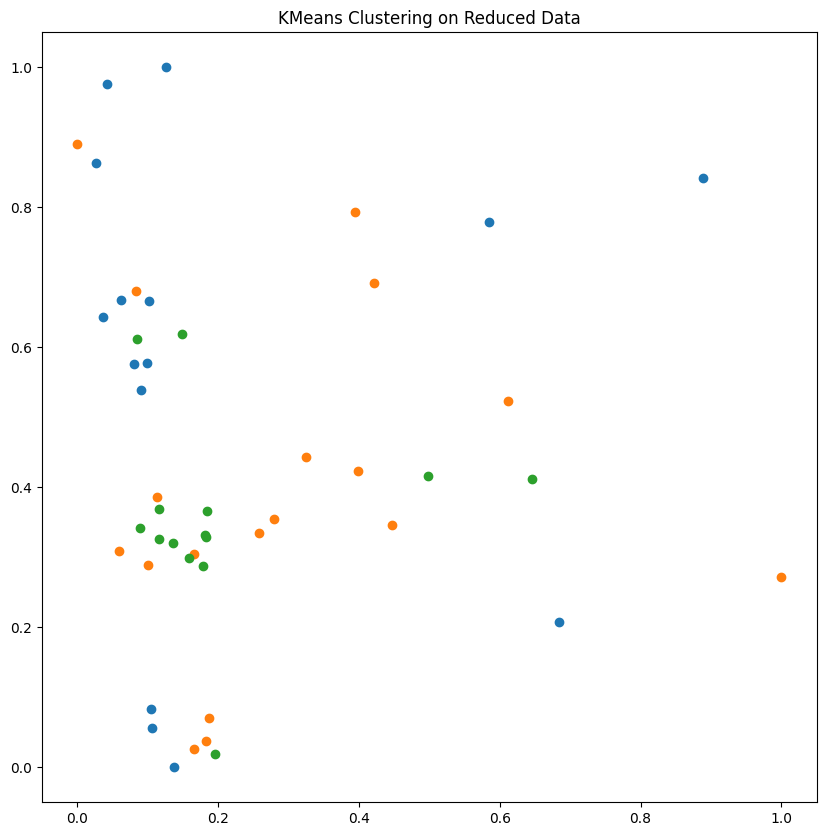

In [829]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_df_X.to_numpy())

u_labels = np.unique(clusters)
 
fig = plt.figure(figsize=(10,10))
for i in u_labels:
    plt.scatter(reduced_df_X.to_numpy()[clusters == i , 0] , reduced_df_X.to_numpy()[clusters == i , 1] , label = i)
plt.title('KMeans Clustering on Reduced Data')
plt.show()

### Classification of reduced_df


In [830]:
res = pd.DataFrame(columns=['Model', 'Accuracy', 'F1_Score', 'Precision', 'Recall'])
customised_vehicle_likelihood_model = {}
for model in models:
  model_res, model_df = model_evaluation(model, X_train, X_test, y_train, y_test, False)
  res = pd.concat([res, model_df], ignore_index=True)
  customised_vehicle_likelihood_model[model.__class__.__name__] = model_res
  del model_res
  del model_df
res = res.sort_values(by='Accuracy', ascending=False)
res = res.reset_index(drop=True)
display(res)

/Users/bentjh01/Documents/01_NTU/Sem_8/temp/MA4829_Machine_Intelligence/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/bt/pg056kkx3wx3rkfyhvzh2lwh0000gn/T/ipykernel_87429/2469178712.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, model_df], ignore_index=True)
/Users/bentjh01/Documents/01_NTU/Sem_8/temp/MA4829_Machine_Intelligence/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill

,Model,Accuracy,F1_Score,Precision,Recall
0,DecisionTreeClassifier,0.600,0.564,0.589,0.600
1,ExtraTreesClassifier,0.533,0.486,0.570,0.533
2,RandomForestClassifier,0.467,0.422,0.467,0.467
3,GaussianNB,0.467,0.422,0.459,0.467
4,LogisticRegression,0.400,0.264,0.252,0.400
5,KNeighborsClassifier,0.333,0.314,0.424,0.333


### Clustering on reduced_components


In [831]:
scaler = MinMaxScaler()
df = reduced_components_df.copy()
df.drop('customise_spend_encoded', axis=1, inplace=True)
df = pd.DataFrame(data = scaler.fit_transform(df), columns = df.columns)

reduced_components_df_X = df
reduced_components_df_y = reduced_df['customise_spend_encoded']

X_train, X_test, y_train, y_test = train_test_split(reduced_components_df_X, reduced_components_df_y, test_size=0.3, random_state=42)

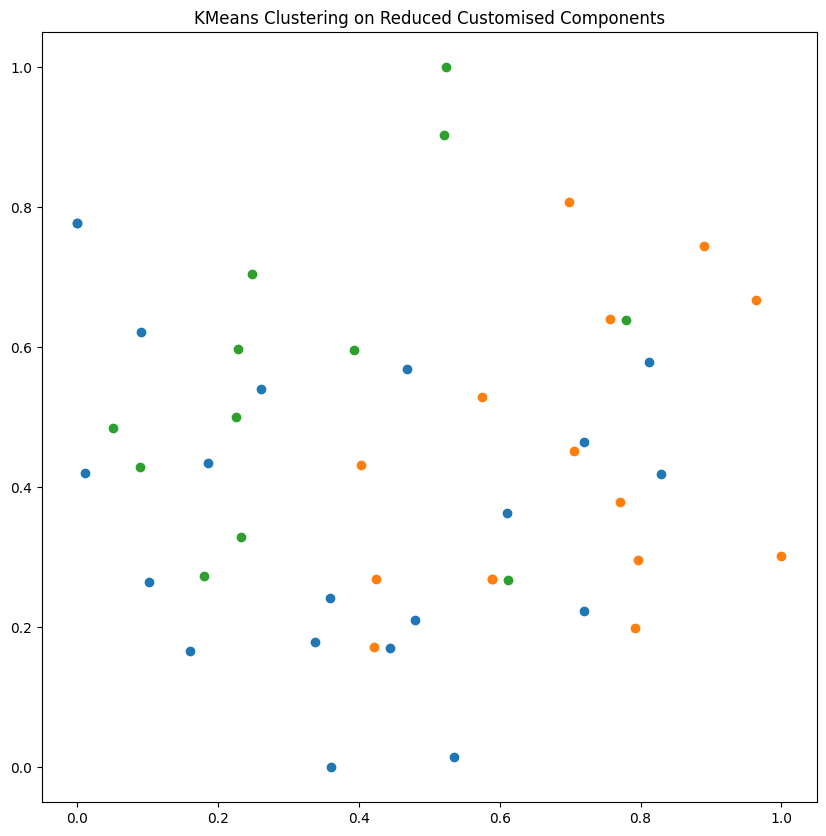

In [832]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_components_df_X.to_numpy())

u_labels = np.unique(clusters)
fig = plt.figure(figsize=(10,10))
for i in u_labels:
    plt.scatter(reduced_components_df_X.to_numpy()[clusters == i , 0] , reduced_components_df_X.to_numpy()[clusters == i , 1] , label = i)
plt.title('KMeans Clustering on Reduced Customised Components')
plt.show()

### Classification on reduced_components


In [833]:
res = pd.DataFrame(columns=['Model', 'Accuracy', 'F1_Score', 'Precision', 'Recall'])
customised_vehicle_likelihood_model = {}
for model in models:
  model_res, model_df = model_evaluation(model, X_train, X_test, y_train, y_test, False)
  res = pd.concat([res, model_df], ignore_index=True)
  customised_vehicle_likelihood_model[model.__class__.__name__] = model_res
  del model_res
  del model_df
res = res.sort_values(by='Accuracy', ascending=False)
res = res.reset_index(drop=True)
display(res)

/Users/bentjh01/Documents/01_NTU/Sem_8/temp/MA4829_Machine_Intelligence/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/bt/pg056kkx3wx3rkfyhvzh2lwh0000gn/T/ipykernel_87429/2469178712.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, model_df], ignore_index=True)
/Users/bentjh01/Documents/01_NTU/Sem_8/temp/MA4829_Machine_Intelligence/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill

,Model,Accuracy,F1_Score,Precision,Recall
0,DecisionTreeClassifier,0.333,0.300,0.276,0.333
1,RandomForestClassifier,0.267,0.214,0.224,0.267
2,KNeighborsClassifier,0.267,0.213,0.200,0.267
3,LogisticRegression,0.200,0.111,0.077,0.200
4,ExtraTreesClassifier,0.200,0.169,0.167,0.200
5,GaussianNB,0.133,0.083,0.061,0.133


## Association Rules on Products


In [834]:
purchase_factors_df = data.loc[:, purchase_factors]
for col in purchase_factors_df.columns:
  purchase_factors_df[col] = purchase_factors_df.apply(lambda row: True if row[col] == 1 else False, axis=1)

trans = Transactions.from_df(purchase_factors_df)

rules = apriori(trans,
                    parameter = parameters({"supp": 0.1, "conf": 0.8}), 
                    control = parameters({"verbose": False}))  
rules_df = rules.as_df()
rules_df = rules_df.sort_values(by='lift', ascending=False)
rules_df.to_csv('purchase_factors_rules.csv')
display(rules_df)

,LHS,RHS,support,confidence,coverage,lift,count
63,"{purchase_factors:Price,purchase_factors:Custo...",{purchase_factors:Sustainability/environment c...,0.106383,0.833333,0.127660,2.447917,5
66,"{purchase_factors:Price,purchase_factors:Funct...",{purchase_factors:Size},0.106383,0.833333,0.127660,1.566667,5
68,"{purchase_factors:Price,purchase_factors:Custo...",{purchase_factors:Technological features},0.106383,1.000000,0.106383,1.516129,5
72,"{purchase_factors:Functionality,purchase_facto...",{purchase_factors:Technological features},0.106383,1.000000,0.106383,1.516129,5
12,"{purchase_factors:Customisable options,purchas...",{purchase_factors:Technological features},0.106383,1.000000,0.106383,1.516129,5
...,...,...,...,...,...,...,...
10,{purchase_factors:Functionality},{purchase_factors:Price},0.595745,0.875000,0.680851,0.979167,28
3,{purchase_factors:Sustainability/environment c...,{purchase_factors:Price},0.297872,0.875000,0.340426,0.979167,14
21,"{purchase_factors:Customisable options,purchas...",{purchase_factors:Price},0.127660,0.857143,0.148936,0.959184,6
73,"{purchase_factors:Functionality,purchase_facto...",{purchase_factors:Price},0.106383,0.833333,0.127660,0.932540,5


In [843]:
exterior_components_df = data.loc[:, exterior_components]
for col in exterior_components_df.columns:
  exterior_components_df[col] = exterior_components_df.apply(lambda row: True if row[col] == 1 else False, axis=1)

trans = Transactions.from_df(exterior_components_df)

rules = apriori(trans,
                    parameter = parameters({"supp": 0.1, "conf": 0.8}), 
                    control = parameters({"verbose": False}))  
rules_df = rules.as_df()
rules_df = rules_df.sort_values(by='lift', ascending=False)
rules_df.to_csv('exterior_components_rules.csv')
display(rules_df['RHS'].value_counts().explode())

RHS
{exterior_components:Headlights}    5
{exterior_components:Wheels}        4
{exterior_components:Grilles}       1
Name: count, dtype: int64

In [844]:
interior_components_df = data.loc[:, interior_components]
for col in interior_components_df.columns:
  interior_components_df[col] = interior_components_df.apply(lambda row: True if row[col] == 1 else False, axis=1)

trans = Transactions.from_df(interior_components_df)

rules = apriori(trans,
                    parameter = parameters({"supp": 0.1, "conf": 0.8}), 
                    control = parameters({"verbose": False}))  
rules_df = rules.as_df()
rules_df = rules_df.sort_values(by='lift', ascending=False)
rules_df.to_csv('interior_components_rules.csv')
display(rules_df['RHS'].value_counts().explode())

RHS
{interior_components:Steering wheel}    1
Name: count, dtype: int64

In [842]:
components_df = data.loc[:, interior_components+exterior_components]
for col in components_df.columns:
  components_df[col] = components_df.apply(lambda row: True if row[col] == 1 else False, axis=1)

trans = Transactions.from_df(components_df)

rules = apriori(trans,
                    parameter = parameters({"supp": 0.1, "conf": 0.8}), 
                    control = parameters({"verbose": False}))  
rules_df = rules.as_df()
rules_df = rules_df.sort_values(by='lift', ascending=False)
rules_df.to_csv('components_df_rules.csv')
display(rules_df['RHS'].value_counts().explode())

RHS
{exterior_components:Wheels}            45
{exterior_components:Headlights}        30
{interior_components:Steering wheel}    22
{interior_components:Dashboard}         18
{exterior_components:Side mirrors}       8
{exterior_components:Grilles}            2
Name: count, dtype: int64

In [838]:
arules_df = data.copy()
select_columns = ['customise_spend_encoded']+interior_components+exterior_components
for col in arules_df.columns:
  if col not in select_columns:
    arules_df.drop(col, axis=1, inplace=True)

trans = Transactions.from_df(arules_df)

rules = apriori(trans,
                    parameter = parameters({"supp": 0.1, "conf": 0.8}), 
                    control = parameters({"verbose": False}))  
rules_df = rules.sort(by = 'lift').as_df()
customise_spend_df = rules_df.loc[rules_df['RHS'] == '{customise_spend_encoded=[2,3]}']
customise_spend_df.to_csv('customise_spend_rules.csv')
display(customise_spend_df)

R[write to console]: In addition: 
R[write to console]: There were 15 warnings (use warnings() to see them)
R[write to console]: 



,LHS,RHS,support,confidence,coverage,lift,count
